# Classification
Andrew Zhang(azhang42)

## What is classification?

Classification is a type of algorithm that enables computers to categorize or classify data into predefined categories or classes. For example, I can categorize a picture into cats or dogs. Classification is a supervised learning algorithm, which means that the data is labeled and the algorithm learns to classify data into categories.

## Types of machine learning classification algorithms

There are many types of machine learning classification algorithms, such as decision trees, random forests, support vector machines, naive bayes, neural networks. I will focus on neural networks in this notebook. In contrast to the previous blog about regression, in neural networks for classification, the output layer is typically a softmax layer, which outputs a probability distribution over the classes. I will focus on a mushroom classification task I found on Kaggle.

In [1]:
# First, let's import the necessary libraries and laod the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mushrooms = pd.read_csv('./mushrooms.csv')

In [3]:
# Let's examine the data.
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushrooms.shape

(8124, 23)

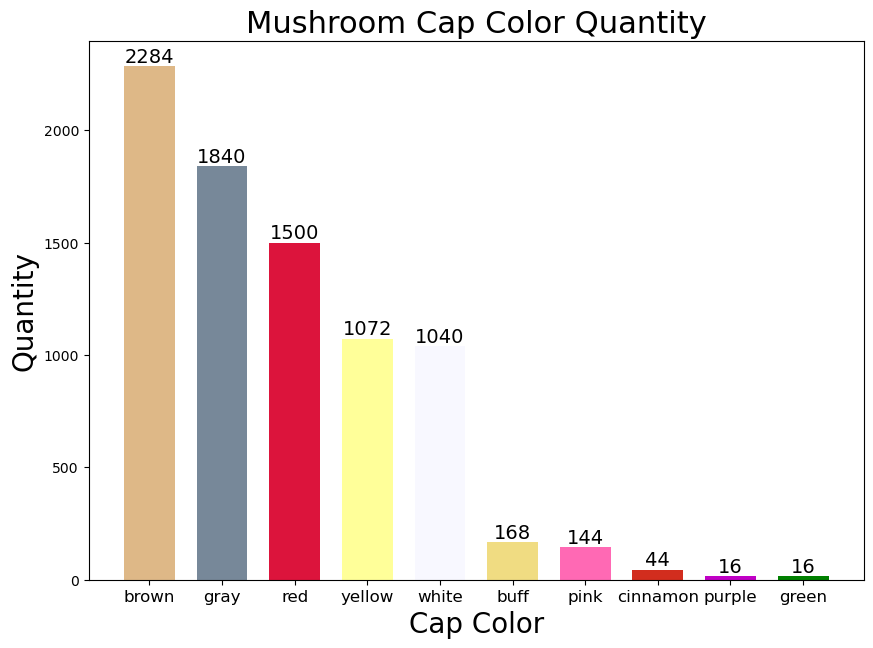

In [5]:
# Let's visualize the colors of the mushrooms

def prepare_data(df, column_name):
    """ Prepare the data for plotting. """
    value_counts = df[column_name].value_counts()
    return value_counts.values.tolist(), value_counts.index.tolist()

def setup_plot(ax, xlabel, ylabel, title, xticklabels, fontsize=12):
    """ Set up the plot with labels and title. """
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_title(title, fontsize=22)
    ax.set_xticks(np.arange(len(xticklabels)))
    ax.set_xticklabels(xticklabels, fontsize=fontsize)

def add_bar_labels(ax, bars, fontsize=14):
    """ Add labels to bars in the plot. """
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height)}',
                ha='center', va='bottom', fontsize=fontsize)

# Main script
mushrooms = pd.read_csv('mushrooms.csv')  # Load your data
m_height, cap_color_labels = prepare_data(mushrooms, 'cap-color')

fig, ax = plt.subplots(figsize=(10,7))
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
mushroom_bars = ax.bar(np.arange(len(m_height)), m_height, width=0.7, color=colors)

setup_plot(ax, "Cap Color", "Quantity", "Mushroom Cap Color Quantity", 
           ['brown', 'gray', 'red', 'yellow', 'white', 'buff', 'pink', 'cinnamon', 'purple', 'green'])

add_bar_labels(ax, mushroom_bars)
plt.show()

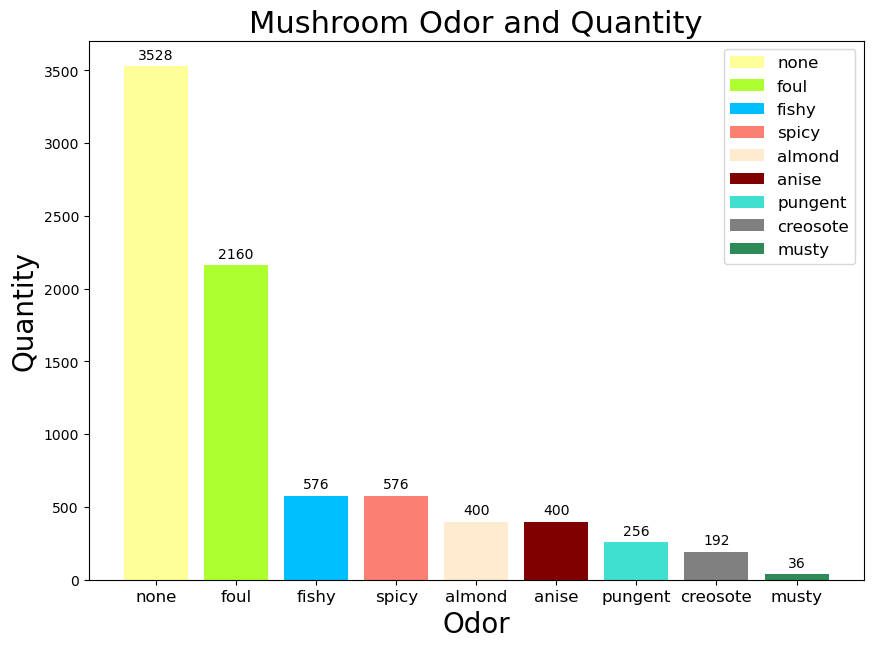

In [8]:
# Assuming mushrooms_df is your DataFrame
odors = mushrooms['odor'].value_counts()

# Plot preparations
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']
labels = ['none', 'foul', 'fishy', 'spicy', 'almond', 'anise', 'pungent', 'creosote', 'musty']
legend_labels = labels

# Function to label bars
def autolabel(bars):
    """Attach a text label above each bar displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
odor_bars = ax.bar(odors.index, odors.values, color=colors)

# Customizing the plot
ax.set_xlabel("Odor", fontsize=20)
ax.set_ylabel('Quantity', fontsize=20)
ax.set_title('Mushroom Odor and Quantity', fontsize=22)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, fontsize=12)
ax.legend(odor_bars, legend_labels, fontsize=12)
autolabel(odor_bars)

plt.show()


In [7]:
# Now, we will perform a logistic regression on the data. The target variable (y) is the class. We will split into train and test sets for evaluation.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Check for missing values
missing_values = mushrooms.isnull().sum()
if missing_values.sum() != 0:
    # Handle missing values if any
    pass

# One-hot encoding of categorical variables
encoded_mushrooms_df = pd.get_dummies(mushrooms)

# Separate features and target variable
X = encoded_mushrooms_df.drop(['class_p', 'class_e'], axis=1)
y = encoded_mushrooms_df['class_p']  # Using 'class_p' as the target (1 for poisonous)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
logreg_model = LogisticRegression(max_iter=8)
logreg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Output the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.992616899097621
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1257
        True       1.00      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



/Users/andrewzhang/opt/anaconda3/envs/cs5864/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/andrewzhang/opt/anaconda3/envs/cs5864/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrewzhang/opt/anaconda3/envs/cs5864/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is depreca

As you can see, the logistic regression does very well on the dataset. One reason for this is that the dataset is not very large, and the values were already cleaned on Kaggle. Finally, there are some very distinctive features, such as odor, that have a strong correlation between whether or not the mushroom is toxic. Therefore, it is easy for the model to learn to classify the mushrooms.